In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('D:/sql/Data set/Weigh predection/500_person.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,4
1,Male,189.0,87.0,2
2,Female,185.0,110.0,4
3,Female,195.0,NaN,3
4,Male,149.0,61.0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  496 non-null    object 
 1   Height  498 non-null    float64
 2   Weight  497 non-null    float64
 3   Index   500 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

Gender    4
Height    2
Weight    3
Index     0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [34]:
df['Gender'].value_counts()

Gender
Female    248
Male      243
Name: count, dtype: int64

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  491 non-null    int32  
 1   Height  491 non-null    float64
 2   Weight  491 non-null    float64
 3   Index   491 non-null    int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 17.3 KB


In [36]:
df.describe()

,Gender,Height,Weight,Index
count,491.000000,491.000000,491.000000,491.000000
mean,0.494908,169.967413,106.038697,3.749491
std,0.500484,16.423321,32.403838,1.355403
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,0.000000,171.000000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


D:\Anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda_3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda_3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


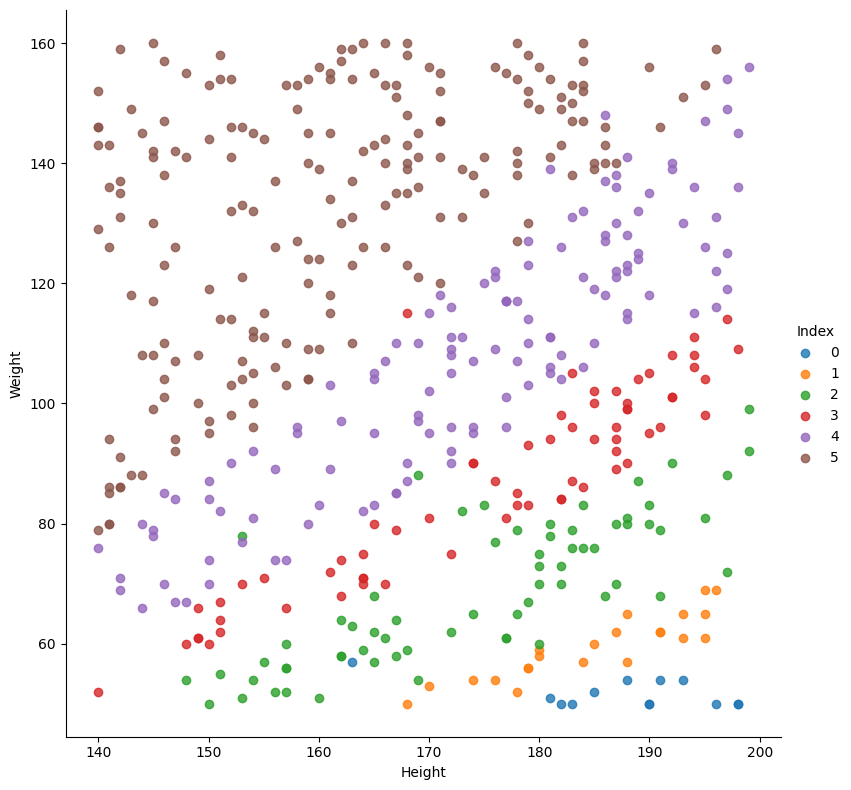

In [46]:
sns.lmplot( x='Height', y='Weight',data=df,hue='Index',height=8,fit_reg=False,aspect=1)



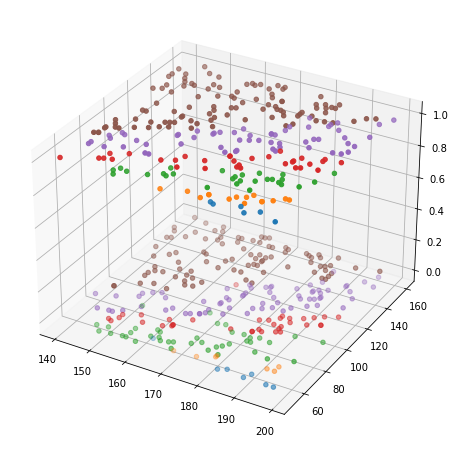

In [7]:
from mpl_toolkits.mplot3d import Axes3D
groups = df.groupby('Index')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for name,group in groups:
    ax.scatter(group.Height, group.Weight, group.male)
plt.show()


In [9]:
df['Index'].value_counts()

Index
5    194
4    129
3     67
2     66
1     22
0     13
Name: count, dtype: int64

# My Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.linear_model import LinearRegression

In [11]:
y=df['Index']
X=df.drop(['Index'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(392, 3)
(99, 3)
(392,)
(99,)


In [12]:
model = SVC()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8086734693877551
0.8282828282828283
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.86      0.72      0.78        25
           3       0.88      0.50      0.64        14
           4       0.83      0.87      0.85        23
           5       0.93      1.00      0.96        37

    accuracy                           0.83        99
   macro avg       0.58      0.51      0.54        99
weighted avg       0.88      0.83      0.84        99

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 3  3 18  1  0  0]
 [ 0  0  3  7  4  0]
 [ 0  0  0  0 20  3]
 [ 0  0  0  0  0 37]]


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
model_tree = RandomForestClassifier()
model_tree.fit(X_train,y_train)
y_train_pred = model_tree.predict(X_train)
y_pred = model_tree.predict(X_test)
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

1.0
0.8585858585858586
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      0.40      0.50         5
           2       0.71      0.94      0.81        16
           3       0.88      0.58      0.70        12
           4       0.88      0.84      0.86        25
           5       0.93      0.97      0.95        38

    accuracy                           0.86        99
   macro avg       0.84      0.79      0.80        99
weighted avg       0.86      0.86      0.85        99

[[ 3  0  0  0  0  0]
 [ 0  2  3  0  0  0]
 [ 0  1 15  0  0  0]
 [ 0  0  3  7  2  0]
 [ 0  0  0  1 21  3]
 [ 0  0  0  0  1 37]]


In [13]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_train_pred = lgr.predict(X_train)
y_pred = lgr.predict(X_test)

print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7397959183673469
0.7878787878787878
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      0.67      0.67         3
           2       0.81      0.89      0.85        19
           3       0.75      0.40      0.52        15
           4       0.67      0.70      0.68        23
           5       0.85      0.94      0.89        36

    accuracy                           0.79        99
   macro avg       0.79      0.77      0.77        99
weighted avg       0.78      0.79      0.78        99

[[ 3  0  0  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  1 17  1  0  0]
 [ 0  0  3  6  6  0]
 [ 0  0  0  1 16  6]
 [ 0  0  0  0  2 34]]


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
import pickle

with open('Weight Predection lgr_model.pkl', 'wb') as file:
    pickle.dump(lgr, file)